### Cena 2
- Simulação com a mini câmara com material de 2.5cm de espessura
- Aplicando impedância de superfície calculada apartir da formulação da ISO 354.


### Importando bibliotecas


In [1]:
# Importando bibliotecas

import femder as fd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from femder.FEM_3D import  p2SPL

Default Plotly renderer: jupyterlab


### Importando resultados experimentais
- velocidade de volume
- coef. absorção ISO 354
- sinal medido nos receptores
- respostas impulsivas

In [58]:
import scipy.io as sio

# q = sio.loadmat(r'G:\\Meu Drive\\TCC\\Simulacao_computacional\\Qi.mat')
q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_150_600_1.mat')
#q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_601_1k_0.5.mat')
# q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_1k_2k_0.5.mat')
#q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_150_600_0.5.mat')
#q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_601_1k_0.5.mat')
# q = sio.loadmat(r'C:\\Users\\kemer\\Documents\\CaixasAcusticas\\diafragma_altofalante_Eric_Paulo_Eletroacustica\\Qi_1k_2k_0.5.mat')
# sorted(q.keys())
q = q['Qi'] # até 600Hz

#as_medido = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\a_s.mat')
# sorted(as_medido.keys())

R_comMat = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\pts_freq.mat')
# sorted(R_semMat.keys())

RI_comMat = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\RIs.mat')



FileNotFoundError: [Errno 2] No such file or directory: 'G:\\\\Meu Drive\\\\TCC\\\\Experimental\\\\com_material\\\\espessura_maior\\\\pts_freq.mat'

### Importar geometria, inicializando as classes dos dados de entrada da simulação

In [33]:
# Importar geometria, inicializando as classes dos dados de entrada da simulação

path_to_geo = "G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\material_maisEspesso\minicamara_modificada_semVol_fonte.iges"

AP = fd.AirProperties(c0 = 343)
fmax = 1000 #2000
fmin = 600.5
AC = fd.AlgControls(AP,fmin,fmax,0.5)
S = fd.Source("spherical")
S.coord = np.array([[1.23,0.14,0.1]])
S.q = np.array(q.ravel())
#S.q = np.array([0.001])
R = fd.Receiver()
#R.coord = np.array([[0.33,0.23,0.21],[0.38,0.93,0.21],[0.92,0.95,0.21]]) 
R.coord = np.array([[1.057,0.695,0.282],[0.425,0.925,0.235],
                    [0.409,0.406,0.235],[0.336,0.677,0.282],
                    [0.685,0.965,0.235],[0.661,0.30,0.235]])
 

In [ ]:
# Recuperando a impedância de superficie das paredes da minicamara apartir do coef. de abs medido pela ISO 354

from sea.sea.materials import Material as mat

#with open(r"G:\Meu Drive\TCC\codes\dados-pickle\admitance_minicamara1.pkl","rb") as arquivo:
  #sup_admittance = pickle.load(arquivo)
  
sup = mat(third_octave_bands_statistical_alpha=[0.0912, 0.0813, 0.1370, 0.3288, 0.4946, 0.8103, 0.5480, 0.9666], third_octave_bands = [200, 250, 315, 400, 500, 630, 800, 1000], freq_vec=AC.freq)
sup.impedance_from_alpha(absorber_type="soft porous")
sup_admittance = sup.admittance # Admitancia normalizada
sup_surface_impedance = sup.surface_impedance # Impedancia não normalizada 

In [10]:
# with open('G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\Cena 2\sup_admittance150-2k.pkl', "wb") as arquivo:
#     pickle.dump(sup, arquivo)

# import pickle
# with open("G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\cena1\sup_admittance150-2K.pkl","rb") as arquivo:
#   sup_minicam = pickle.load(arquivo)

# with open("G:\Meu Drive\TCC\Simulacao_computacional\codes\dados-pickle\Cena 2\sup_admittance150-2k.pkl","rb") as arquivo:
#   sup_mat = pickle.load(arquivo)

In [22]:
# Boundary Conditions
BC = fd.BC(AC,AP) #[2,3,4,5,6,7]
# #BC.normalized_admittance(6,sup.admittance)
BC.delany(7,RF=12100, d=0.025, model='miki')
BC.delany(8,RF=12100, d=0.025, model='miki')
BC.delany(9,RF=12100, d=0.025, model='miki')
BC.delany(10,RF=12100, d=0.025, model='miki')
BC.delany(11,RF=12100, d=0.025, model='miki')
BC.normalized_admittance([2,3,4,5,6,12,13,14,15,16,17],0.004)

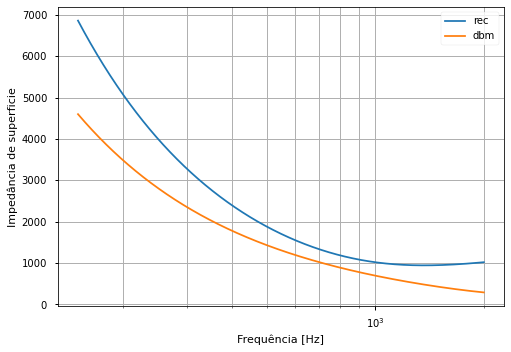

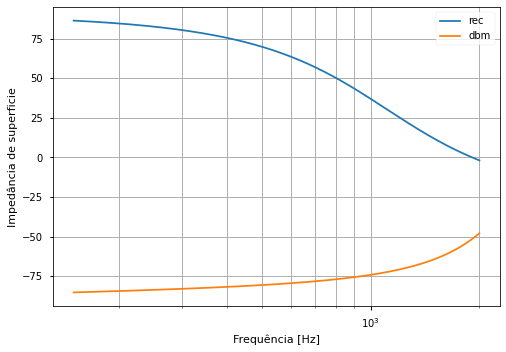

In [30]:
plt.semilogx(AC.freq, abs(1/As_rec), label='rec')
plt.semilogx(AC.freq, abs(1/As_dbm), label='dbm')
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Impedância de superficie')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

plt.semilogx(AC.freq, np.angle(1/As_rec,deg=True), label='rec')
plt.semilogx(AC.freq, np.angle(1/As_dbm,deg=True), label='dbm')
#plt.xlim(20, 10000)
#plt.ylim(0, 100)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Impedância de superficie')
plt.legend()
plt.grid(True,which="both")
#plt.savefig('L_fixo.png')
plt.show()

### Verificação da equivalência entre os alphas (in x recuperado)

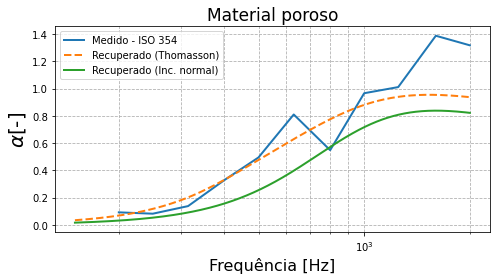

In [18]:
# Verificação da equivalência entre os coefs 
## () analisar recuperando com alphas em bando de terç de oitava
## () calcular erro entre os coefs
z_ar = AP.c0*AP.rho0
#Zs = sup.surface_impedance/z_ar
Zs = BC.mu[6]*z_ar
Reflexao = (Zs - 1) / (Zs + 1)
Absorcao = 1 - (np.abs(Reflexao) ** 2)  # 1 - |R|²
plt.figure(figsize=(7,4))
plt.semilogx(as_medido['f'][:11], as_medido['a_s'][:11], linestyle='-', label = 'Medido - ISO 354',linewidth=2)
plt.semilogx(AC.freq, sup.statistical_alpha,label='Recuperado (Thomasson)', linestyle='--', linewidth=2)
plt.semilogx(AC.freq, Absorcao, linestyle='-', label = 'Recuperado (Inc. normal)',linewidth=2)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.title('Material poroso', fontsize=17)
plt.xlabel('Frequência [Hz]', fontsize=16)
plt.ylabel(r'$\alpha$[-]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
plt.tight_layout()
#plt.ylim((0,0.4))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
plt.show()

### Geração da malha, inicializando a classe FEM3D com os dados de entrada e o plote da geomeria com a malha 2D


In [23]:
grid = fd.GridImport3D(AP,path_to_geo,S,R,fmax = fmax,num_freq=6,scale=1000,order=1,load_method='meshio')
obj = fd.FEM3D(grid,S,R,AP,AC,BC)
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

### Cálculo das pressões com o método de elementos finitos

In [24]:
obj.compute() # debug e comparar vel const e dpendente freqa
#obj.evaluate(R)

FEM | Assembling surface matrix: 100%|█████████████████████████| 16/16 [00:00<00:00, 89.74it/s] 
100%|██████████| 1999/1999 [1:17:59<00:00,  2.34s/it]


Time taken: 78.05765504439672 min


In [27]:
# Salva var
import pickle
# with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\DBM_obj_Fonte_1k_2k_0_5.pkl", "wb") as arquivo:
#     pickle.dump(obj, arquivo)


# with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\DBM_obj_Fonte_150_600_0_5.pkl","rb") as arquivo:
#   obj = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\DBM_obj_Fonte_150_600_0_5.pkl","rb") as arquivo:
  obj1 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\DBM_obj_Fonte_601_1k_0_5.pkl","rb") as arquivo:
  obj2 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\DBM_obj_Fonte_1k_2k_0_5.pkl","rb") as arquivo:
  obj3 = pickle.load(arquivo)

obj1.evaluate(R)
obj2.evaluate(R)
obj3.evaluate(R)

array([[-0.29974936-0.13990317j, -0.02780725+0.01875163j,
        -0.01201714-0.2192582j ,  0.02020337-0.06276559j,
        -0.08220467-0.04863659j,  0.07308908-0.17852059j],
       [-0.30081052-0.12978821j, -0.03465162+0.0222165j ,
        -0.04021516-0.21915746j,  0.03587154-0.04403595j,
        -0.08246644-0.04721516j,  0.07644004-0.1544548j ],
       [-0.30002503-0.12008127j, -0.04223663+0.02733907j,
        -0.06800007-0.21127585j,  0.05524771-0.03124873j,
        -0.08293205-0.04567025j,  0.08412869-0.13279446j],
       ...,
       [-0.35683666+0.34836041j,  1.06482415-0.03992152j,
         0.67194722-0.38030472j, -1.1291809 -0.71969716j,
         0.84737245-0.63042153j, -0.52450101+1.27818246j],
       [-0.10758273+0.37769032j,  0.98273015-0.21583606j,
         0.65680664-0.37318735j, -1.11489535-0.56833834j,
         0.7747502 -0.67210196j, -0.27027517+1.36081716j],
       [ 0.10030437+0.30287182j,  0.86786285-0.37682212j,
         0.6795318 -0.36701767j, -1.03411023-0.41157642

In [40]:
obj3.freq[-1]

2000.0

In [54]:
AC.freq[3698]

1999.0

In [55]:
obj1.freq

array([150. , 150.5, 151. , 151.5, 152. , 152.5, 153. , 153.5, 154. ,
       154.5, 155. , 155.5, 156. , 156.5, 157. , 157.5, 158. , 158.5,
       159. , 159.5, 160. , 160.5, 161. , 161.5, 162. , 162.5, 163. ,
       163.5, 164. , 164.5, 165. , 165.5, 166. , 166.5, 167. , 167.5,
       168. , 168.5, 169. , 169.5, 170. , 170.5, 171. , 171.5, 172. ,
       172.5, 173. , 173.5, 174. , 174.5, 175. , 175.5, 176. , 176.5,
       177. , 177.5, 178. , 178.5, 179. , 179.5, 180. , 180.5, 181. ,
       181.5, 182. , 182.5, 183. , 183.5, 184. , 184.5, 185. , 185.5,
       186. , 186.5, 187. , 187.5, 188. , 188.5, 189. , 189.5, 190. ,
       190.5, 191. , 191.5, 192. , 192.5, 193. , 193.5, 194. , 194.5,
       195. , 195.5, 196. , 196.5, 197. , 197.5, 198. , 198.5, 199. ,
       199.5, 200. , 200.5, 201. , 201.5, 202. , 202.5, 203. , 203.5,
       204. , 204.5, 205. , 205.5, 206. , 206.5, 207. , 207.5, 208. ,
       208.5, 209. , 209.5, 210. , 210.5, 211. , 211.5, 212. , 212.5,
       213. , 213.5,

In [56]:
obj2.freq

array([ 601. ,  601.5,  602. ,  602.5,  603. ,  603.5,  604. ,  604.5,
        605. ,  605.5,  606. ,  606.5,  607. ,  607.5,  608. ,  608.5,
        609. ,  609.5,  610. ,  610.5,  611. ,  611.5,  612. ,  612.5,
        613. ,  613.5,  614. ,  614.5,  615. ,  615.5,  616. ,  616.5,
        617. ,  617.5,  618. ,  618.5,  619. ,  619.5,  620. ,  620.5,
        621. ,  621.5,  622. ,  622.5,  623. ,  623.5,  624. ,  624.5,
        625. ,  625.5,  626. ,  626.5,  627. ,  627.5,  628. ,  628.5,
        629. ,  629.5,  630. ,  630.5,  631. ,  631.5,  632. ,  632.5,
        633. ,  633.5,  634. ,  634.5,  635. ,  635.5,  636. ,  636.5,
        637. ,  637.5,  638. ,  638.5,  639. ,  639.5,  640. ,  640.5,
        641. ,  641.5,  642. ,  642.5,  643. ,  643.5,  644. ,  644.5,
        645. ,  645.5,  646. ,  646.5,  647. ,  647.5,  648. ,  648.5,
        649. ,  649.5,  650. ,  650.5,  651. ,  651.5,  652. ,  652.5,
        653. ,  653.5,  654. ,  654.5,  655. ,  655.5,  656. ,  656.5,
      

In [41]:
pR = np.concatenate((obj1.pR,obj2.pR,obj3.pR))
f = np.concatenate((obj1.freq,obj2.freq,obj3.freq))

In [31]:
R_comMat['freqVector'][1995:26600,0]

array([ 150.        ,  150.07518797,  150.15037594, ..., 1999.77443609,
       1999.84962406, 1999.92481203])

### Plote dos NPS resultantes em cada receptor

0.02354257794065182
0.009310877691947725
0.014177817947200294
0.017949423027220014
0.009421868784851123
0.013414512197153321


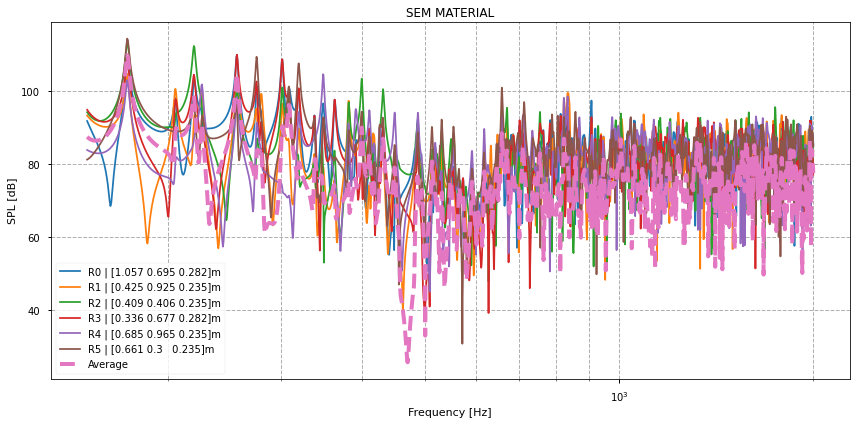

In [6]:
R = fd.Receiver()
#R.coord = np.array([[0.33,0.23,0.21],[0.38,0.93,0.21],[0.92,0.95,0.21]]) 
R.coord = np.array([[1.057,0.695,0.282],[0.425,0.925,0.235],
                    [0.409,0.406,0.235],[0.336,0.677,0.282],
                    [0.685,0.965,0.235],[0.661,0.30,0.235]])
obj.evaluate(R)
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj.R.coord)==1:
  plt.semilogx(obj.freq, p2SPL(obj.pR), linestyle='-', label=f'R | {obj.R.coord[0]}m')
else:
  for i in range(len(obj.R.coord)):
      plt.semilogx(obj.freq, p2SPL(obj.pR[:,i]), linestyle='-', label=f'R{i} | {obj.R.coord[i,:]}m')

if len(obj.R.coord) > 1:
  pR_med = np.mean(obj.pR,axis=1)
  plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
plt.title('SEM MATERIAL')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Comparação NPS dos pontos medido e simulado

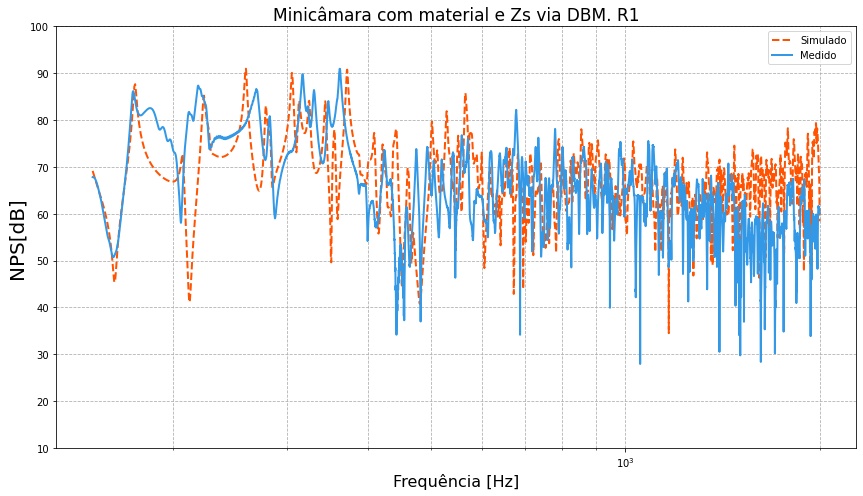

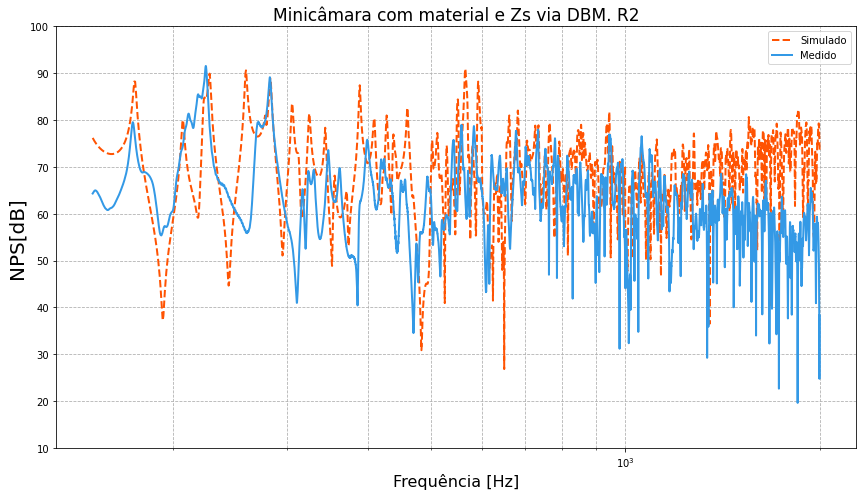

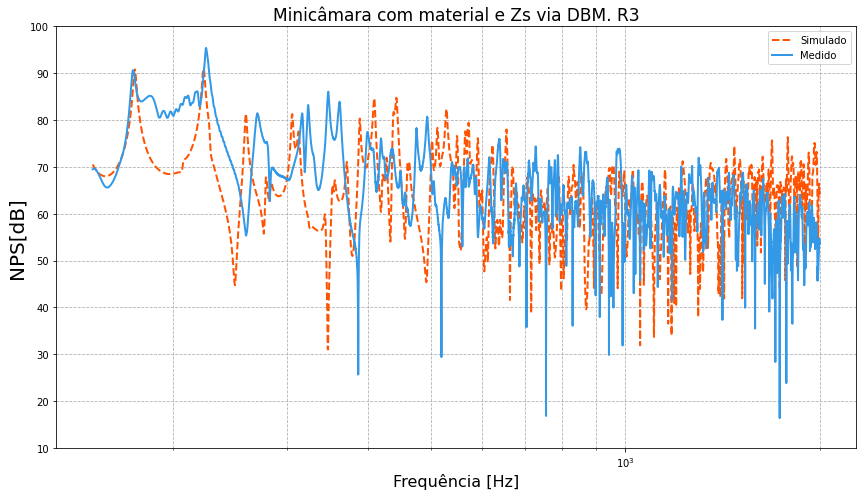

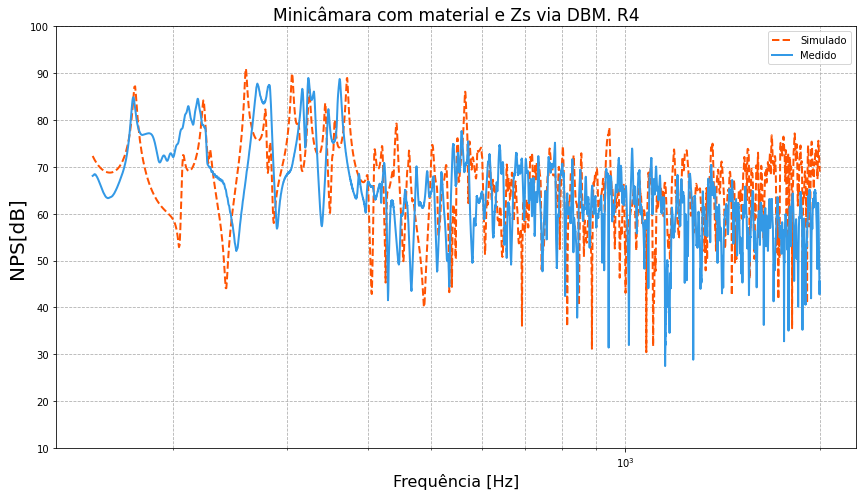

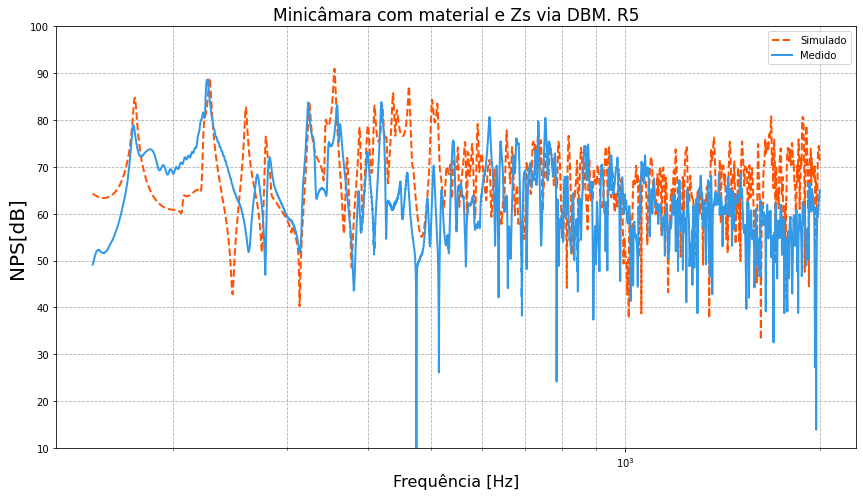

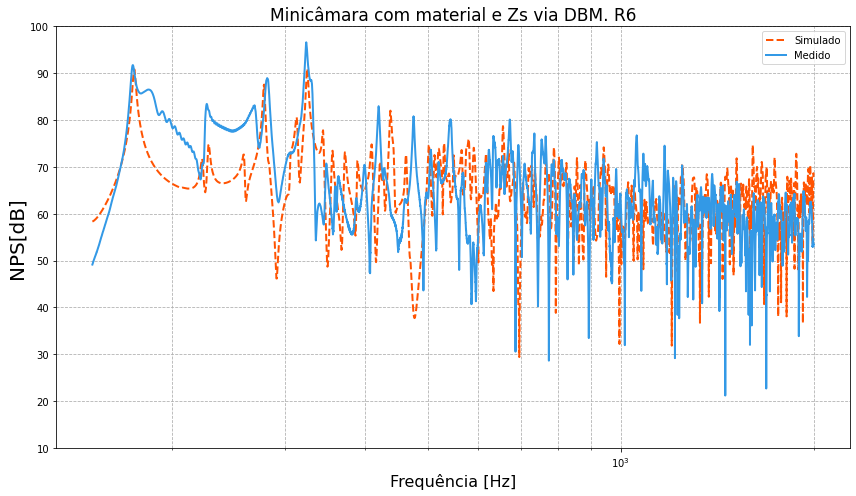

In [42]:
# Impedância de superficie recuperada pelo alpha obtido pela ISO 354
for n in range(0,6):
    plt.figure(figsize=(12,7))
    plt.semilogx(f, p2SPL(pR[:,n]/max(abs(pR[:,n]))),label='Simulado', color='#ff5302', linestyle='--', linewidth=2)
    plt.semilogx(R_comMat['freqVector'][1995:26600,0], p2SPL(R_comMat['pts_freq'][1995:26600,n]/max(abs(R_comMat['pts_freq'][1995:26600,0]))),color=(0.2, 0.6, 0.9), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara com material e Zs via DBM. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  

In [ ]:
# Impedância de superficie recuperada pelo alpha obtido pela ISO 354
for n in range(0,6):
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(obj.pR[:,n]/max(abs(obj.pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_comMat['freqVector'][1981:6600,0], p2SPL(R_comMat['pts_freq'][1981:6600,n]/max(abs(R_comMat['pts_freq'][1981:6600,0]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  

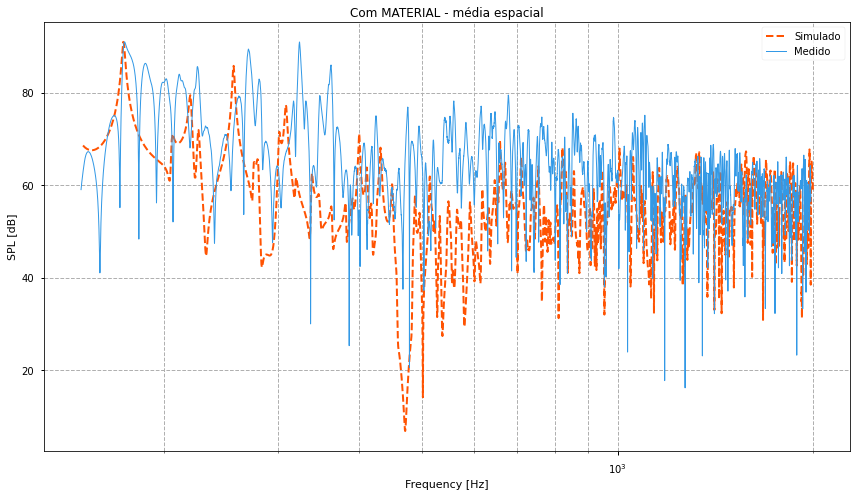

In [10]:
plt.figure(figsize=(12,7))
plt.title('Com MATERIAL - média espacial')
pR_med = np.mean(obj.pR,axis=1) # R_semMat['R_semMatfreq'][2641:7921,n]
R_med = np.mean(R_comMat['pts_freq'][1981:26401],axis=1)

plt.semilogx(obj.freq, p2SPL(pR_med/max(abs(pR_med))), linestyle='--', label='Simulado',color='#ff5302', linewidth=2)
plt.semilogx(R_comMat['freqVector'][1981:26401,0], p2SPL(R_med/max(abs(R_med))), linestyle='-', label='Medido', color=(0.2, 0.6, 0.9),linewidth=1)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
# plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

In [11]:
max(R_comMat['freqVector'])

array([25600.])

### Comparação RIs dos pontos medido e simulado

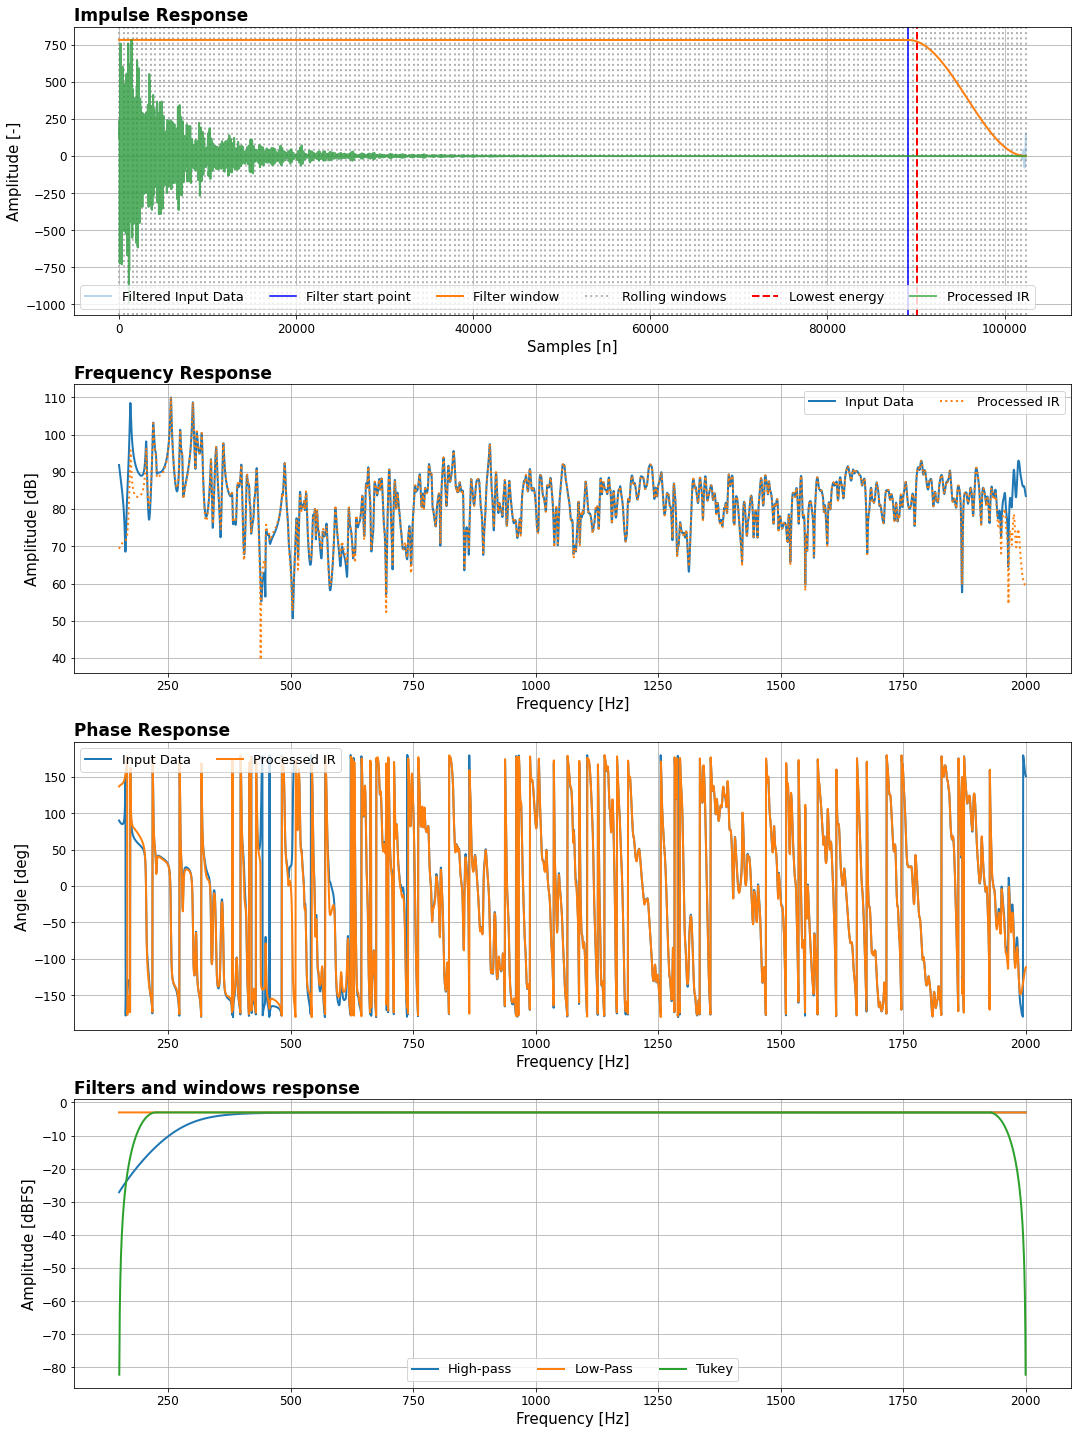

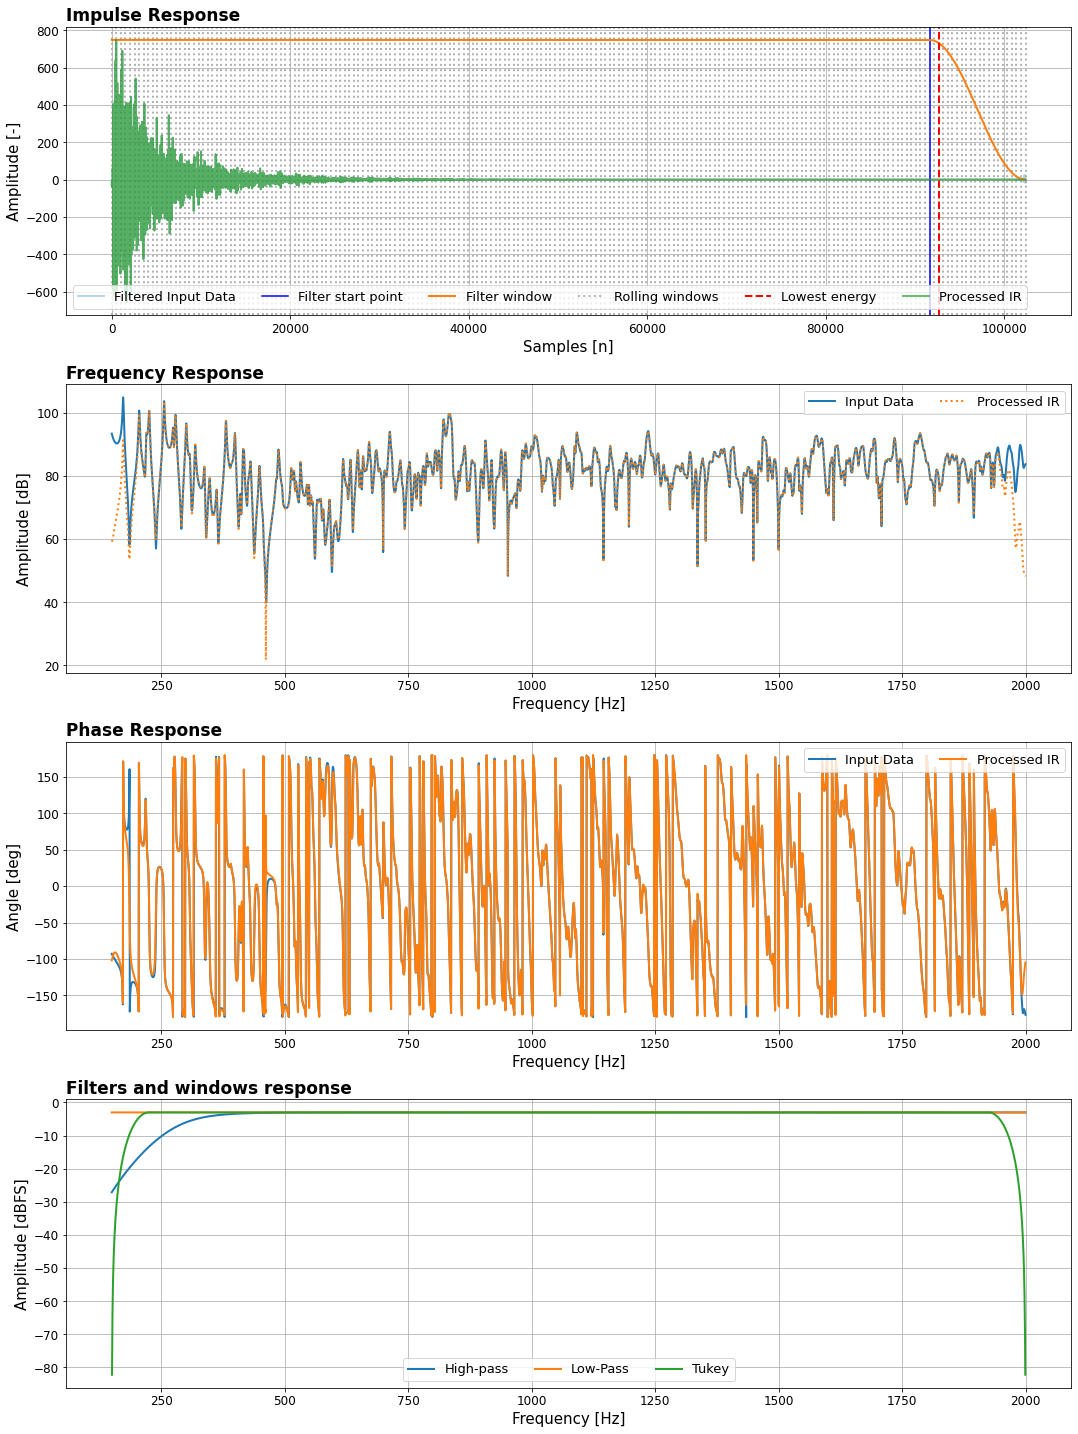

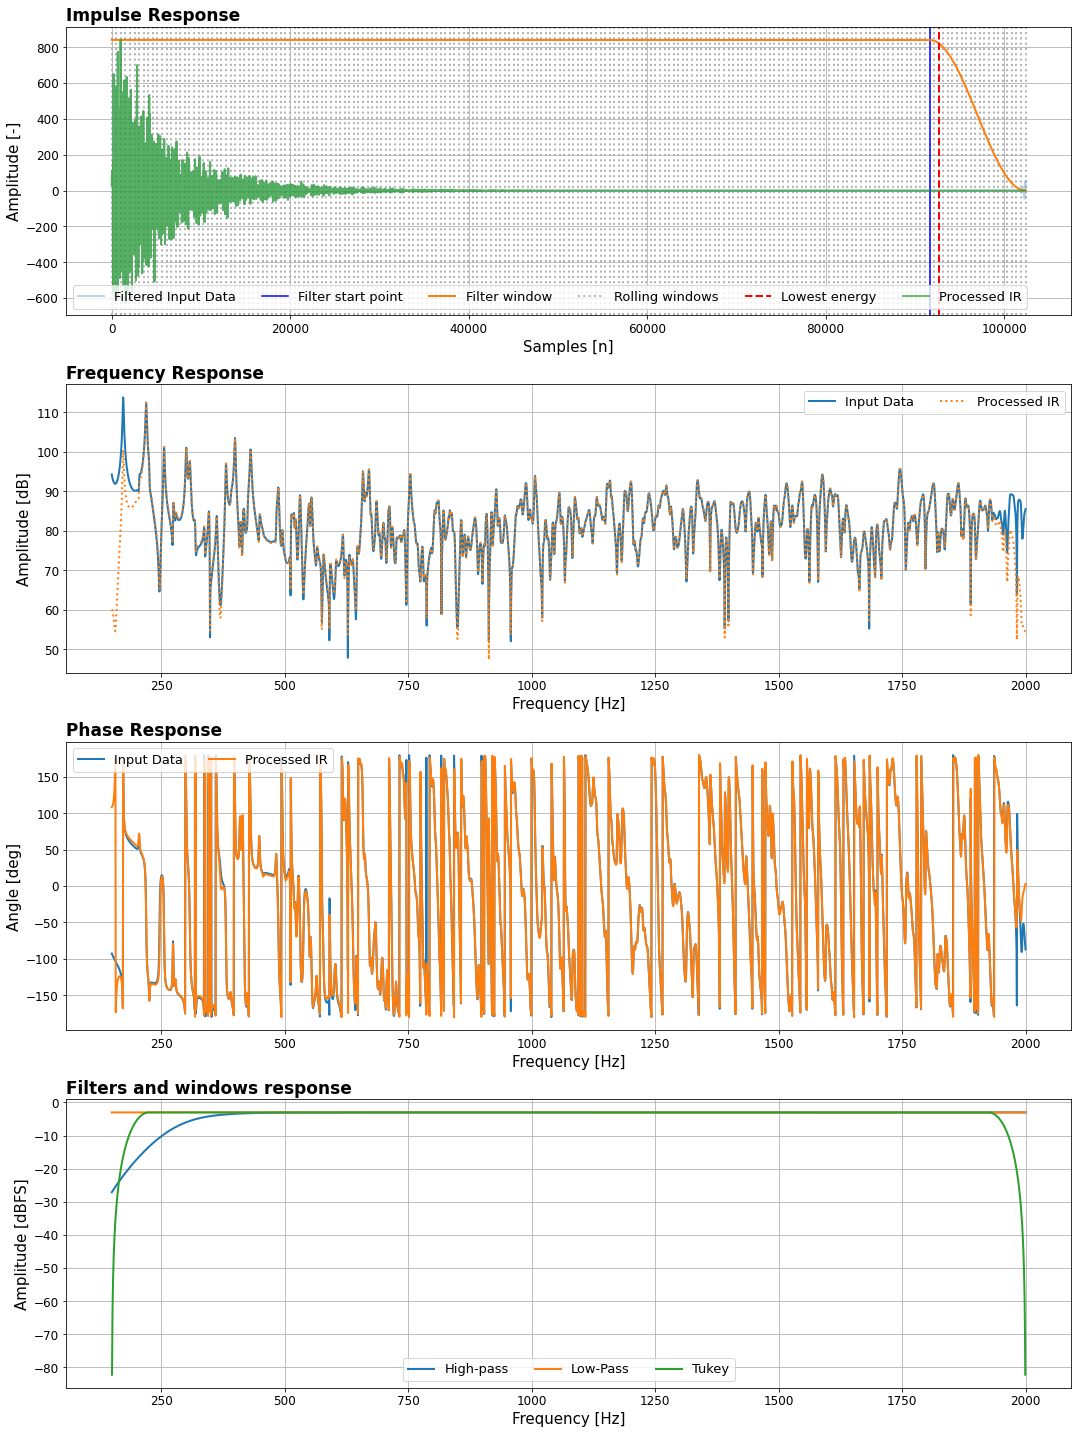

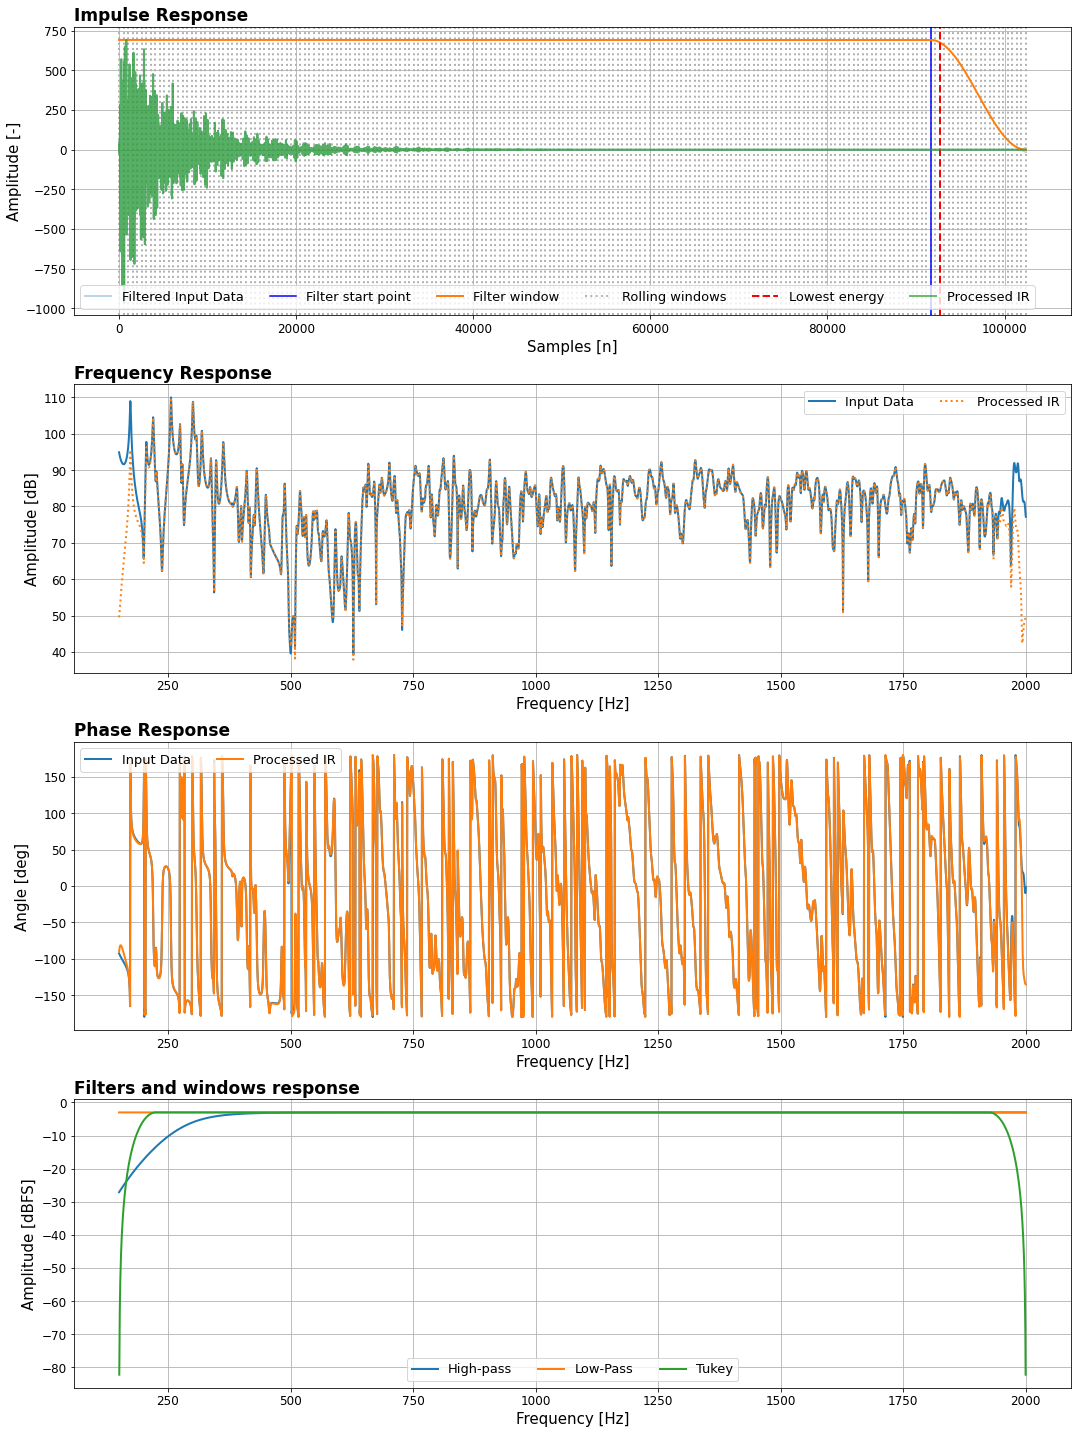

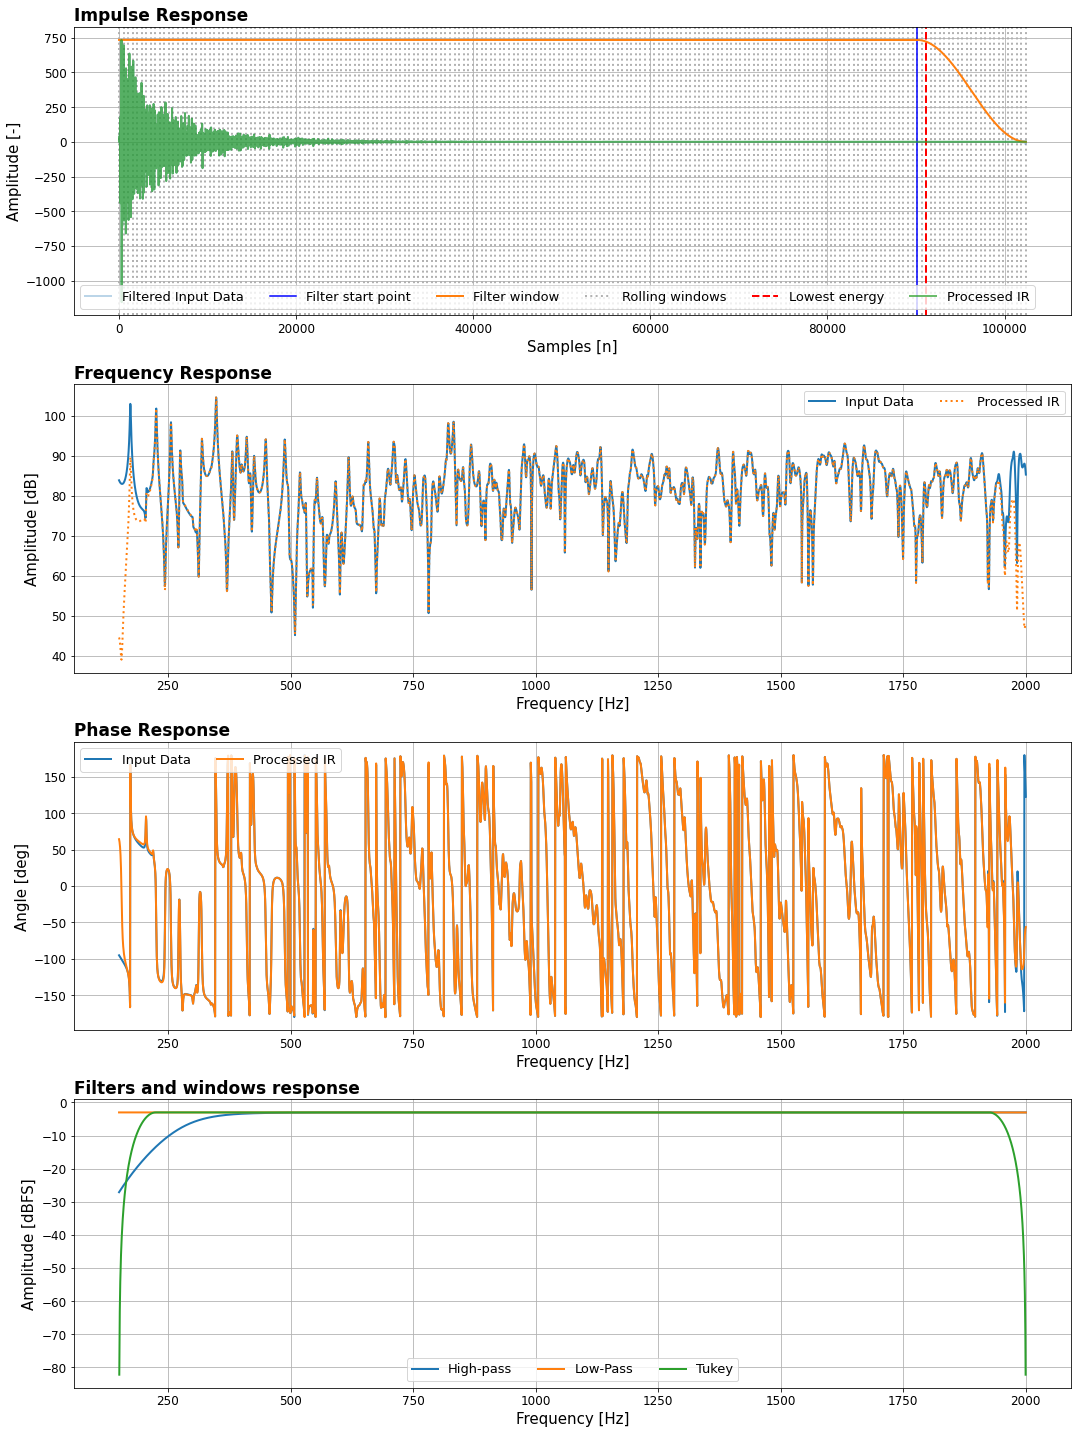

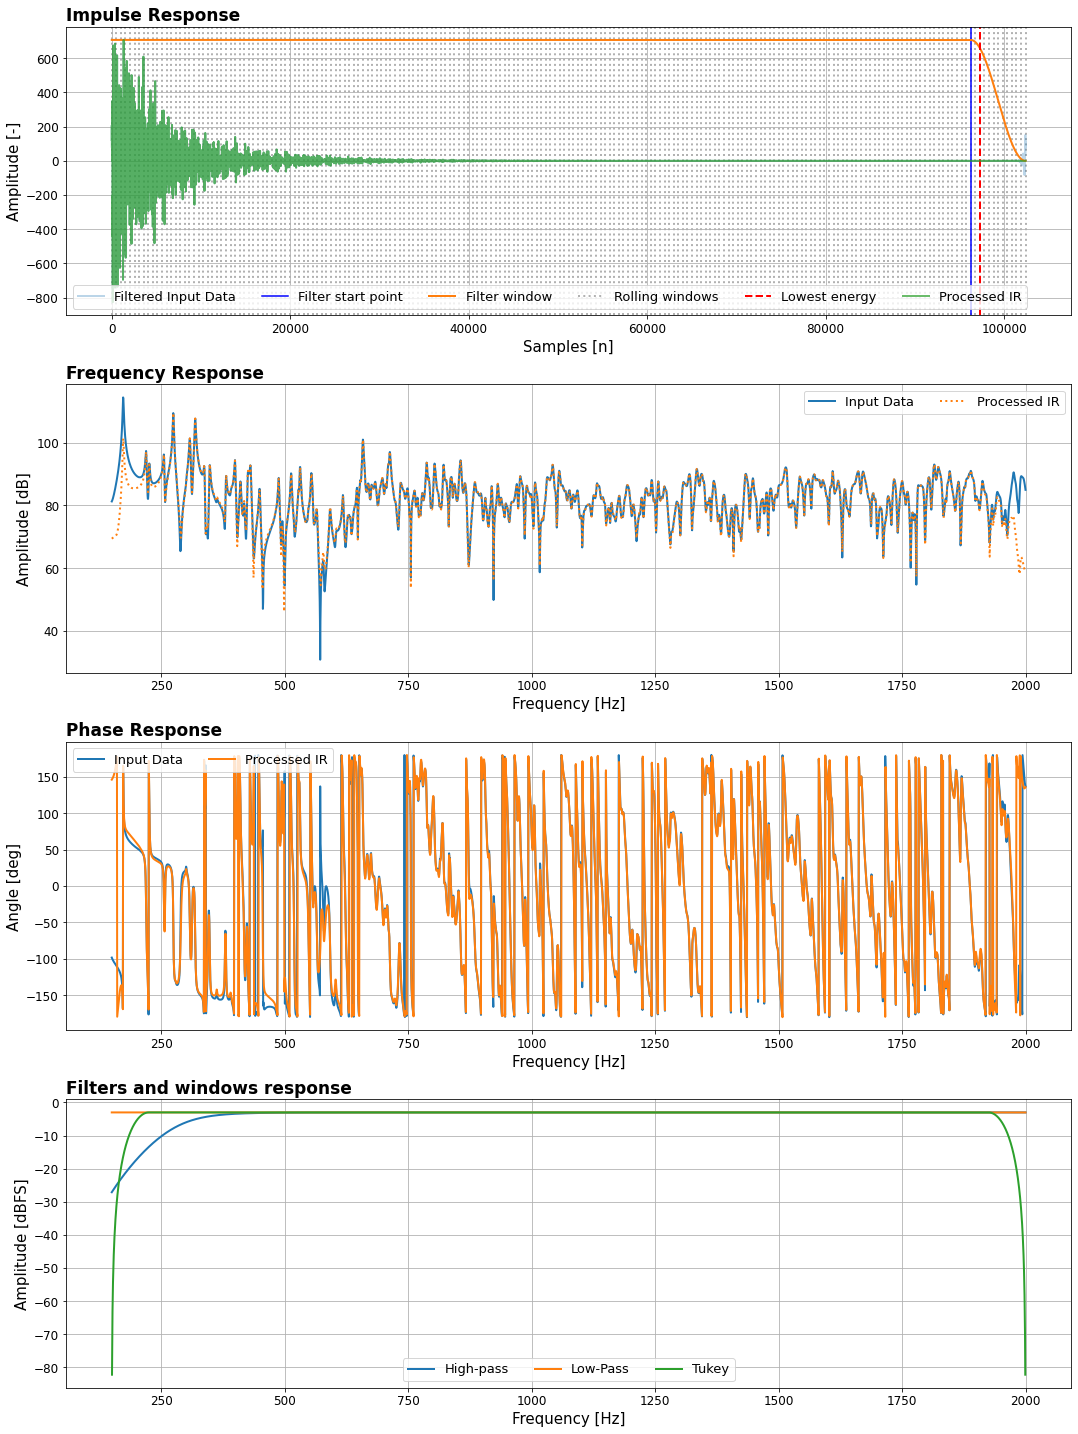

In [27]:
#%% Resposta Impulsiva
domain = fd.Domain(fmin, fmax,2,51200)
domain.alpha = 0.1
ir = np.zeros((len(RI_comMat['RIs_sz']),len(obj.pR[0,:])))
for n in range(0,len(obj.pR[0,:])):
    ir[:,n] = domain.compute_impulse_response(obj.pR[:,n], view=True, irr_filters=False)


In [28]:
# Salvar os dados p importar no MATLAB
from scipy.io import savemat
#savemat('G:\Meu Drive\TCC\Simulacao_computacional\minicamara_comMat\espessura2_5cm\Zs_DBM_cte0_004_RIs_simuladas.mat',{'RIs':ir,'freq':AC.freq})
savemat('G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\Zs_DBM_cte0_004_RIs_simuladas.mat',{'RIs':ir,'freq':AC.freq})



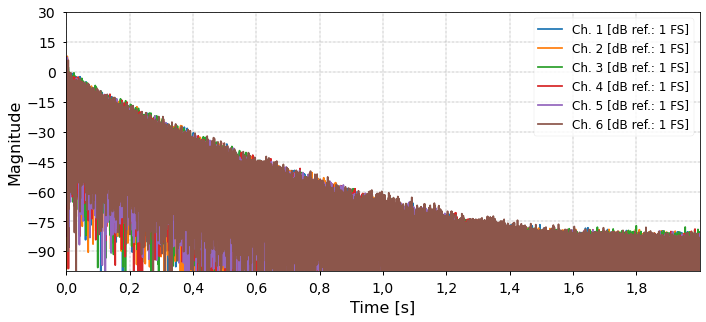

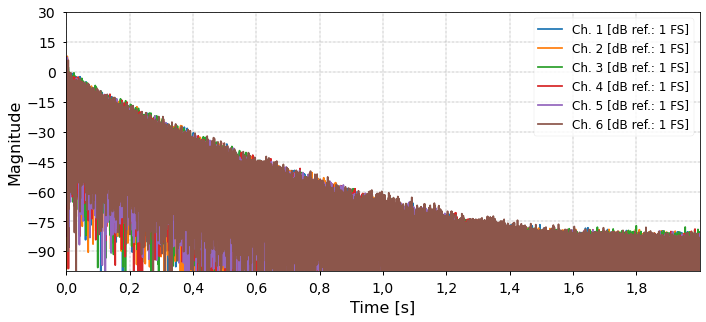

In [84]:

import pytta
txAmostragem = 51200 # [Hz]
# fftDegree = 19
# T = (2**fftDegree-1)/txAmostragem # [s]
# Cria vetor no tempo de um sinal aleatório
#meuRuido = np.random.randn(txAmostragem*T)
# SignalObj com sinal provido pelo usuário
RI_semMat = pytta.SignalObj(RI_semMat['RIs_sz'], 'time', txAmostragem) 
RI_semMat.plot_time_dB(yLim=[-100,30])

### Plote do campo de pressão

In [44]:
# Plote do campo de pressão
obj1.pressure_field(frequencies = 300,renderer='browser',axis=['xy','yz'],saveFig=False,camera_angles=['diagonal_front'],extension='pdf')

G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\material_maisEspesso\minicamara_modificada_semVol_fonte.iges


100%|██████████| 174/174 [00:00<00:00, 801.39it/s]



	Elapsed time to evaluate acoustic field: 0.03 minutes

